In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [47]:
data = pd.read_csv("D:/data/HR-Employee-Attrition.csv",header=0)
data.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [48]:
data.shape

(1470, 35)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [50]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [51]:
data.duplicated().sum()

0

### Lets check the categorical variables to understand the balance of the data.

In [52]:
data['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [53]:
data['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [54]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

- Attrition variable is highly imbalanced, it may effect the model building.

In [55]:
data["Gender"].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [56]:
data['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [57]:
data['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [58]:
data["Over18"].value_counts()

Y    1470
Name: Over18, dtype: int64

- Since everyone are over 18, it is not going to help us in understanding the turnover so dropping over18 column

In [59]:
data['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [60]:
data['JobSatisfaction'].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

In [61]:
data['StockOptionLevel'].unique()

array([0, 1, 3, 2], dtype=int64)

In [62]:
data["WorkLifeBalance"].unique()

array([1, 3, 2, 4], dtype=int64)

In [63]:
data["RelationshipSatisfaction"].value_counts()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

In [64]:
data['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

### Metrics and KPIs

#### Attriton rate: 

In [65]:
data['Attrition'].value_counts()/len(data)*100

No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64

In [66]:
data['Attrition'] = data['Attrition'].map(
                                   {'No':0,'Yes':1})

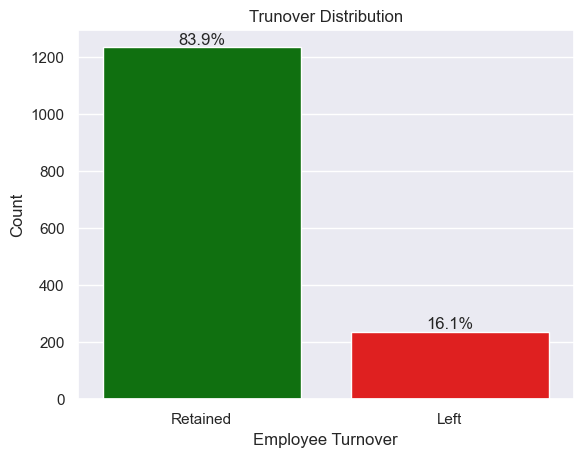

In [67]:
sns.set(style='darkgrid')
ax = sns.countplot(x="Attrition",data=data,palette ={0:'green',1:'red'})

total = len(data['Attrition'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() /2., height + 0.1,
           f'{height/total:.1%}', ha = "center",va = 'bottom')
    
plt.xlabel('Employee Turnover')
plt.ylabel('Count')
plt.title('Trunover Distribution')

ax.set_xticklabels(['Retained', 'Left'])
plt.show()    

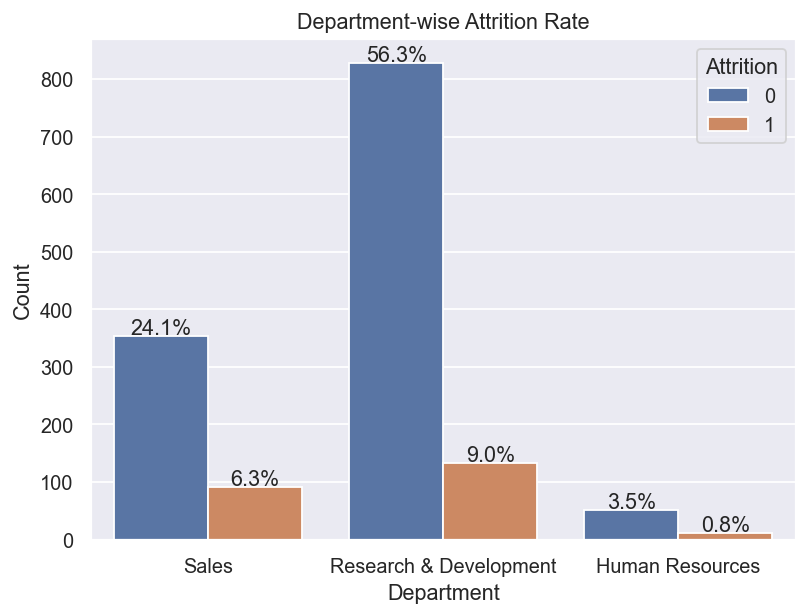

In [68]:
# Lets check department wise attrition rate

plt.figure(figsize=(7,5),dpi=130)
ax = sns.countplot(x="Department",hue="Attrition",data=data,palette="deep")

total = len(data['Department'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            f'{height/total:.1%}',
            ha="center")

plt.title('Department-wise Attrition Rate')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

- From the above graph we can clearly see that the R&D department have high attrition.

- We can also see that 56% of employee were retained in the department, Which is a good indicator of employee engagement.

### Tenure 

In [69]:
data['YearsAtCompany'].describe()

count    1470.000000
mean        7.008163
std         6.126525
min         0.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        40.000000
Name: YearsAtCompany, dtype: float64

* The average tenure of an employee is 7 years. 

* Since the data is skewed coming to a conclusion might not be a good idea.

* There is a huge difference between 75 percentile and maximum value. So the data contains outliers, which need to be treated.

### Time in current role

In [70]:
data['YearsInCurrentRole'].describe()

count    1470.000000
mean        4.229252
std         3.623137
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        18.000000
Name: YearsInCurrentRole, dtype: float64

- Here minimum value 0 may refer to the employees who have recently joined.

- The maximum value of 18 shows that there is an employee who have been in the current role of 18 years. The 75 percentile is 7 that means majority of the employees have spent more time on current role. 

- By using the above information the HR stakeholders can plan for job evalaution.

- Some employees may need job enrichment.

- This variable may significantly contribute to attrition, although that can be only confirmed after model building.

### Gender diversity ratio

In [71]:
gender_dist = data['Gender'].value_counts()

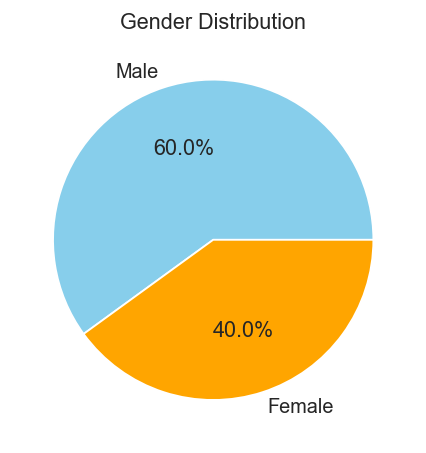

In [72]:
plt.figure(figsize=(4,4),dpi=130)
plt.pie(gender_dist,labels=gender_dist.index, autopct='%1.1f%%', colors=['skyblue', 'orange'])
plt.title('Gender Distribution')
plt.show()

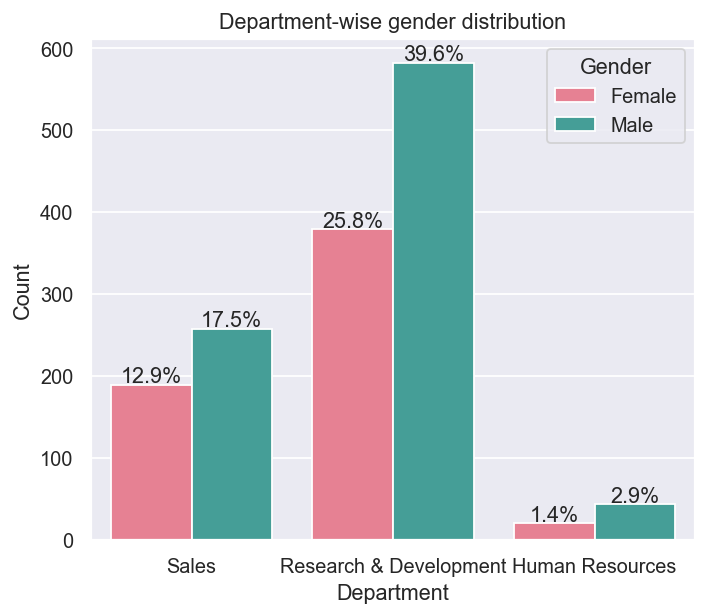

In [73]:
plt.figure(figsize=(6,5),dpi=130)
ax = sns.countplot(x="Department",hue="Gender",data=data,palette="husl")

total = len(data['Department'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            f'{height/total:.1%}',
            ha="center")

plt.title('Department-wise gender distribution')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

- The gender diversity ratio is 6:4, more female candidates need to be hired to bridge this gap.

### Age distribution

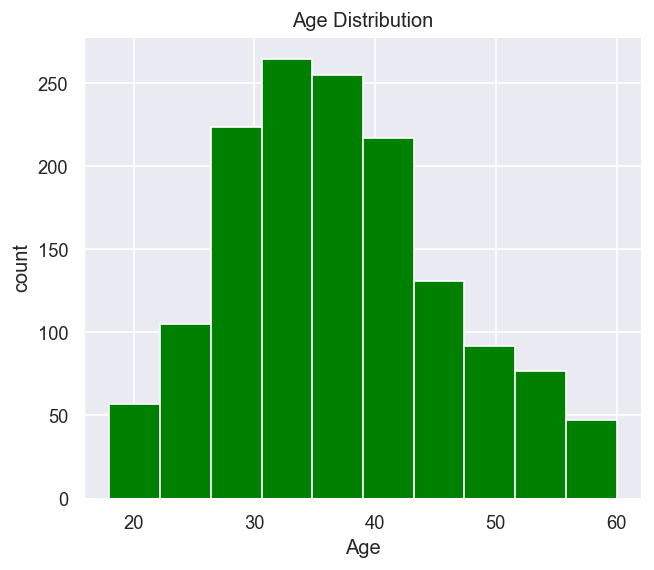

In [74]:
plt.figure(figsize=(6,5),dpi=120)
plt.hist(x='Age',data=data,color='green')
plt.title('Age Distribution')
plt.xlabel("Age")
plt.ylabel("count")
plt.show()

- From the above histogram we can see that the majority of the workforce fall between the age group of 30 to 50, which indicates the age diversity in the organisation

## Statistical analysis

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [76]:
data.drop("Over18",axis=1,inplace=True)

In [77]:
data.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


* From the above analysis we can get an idea about the skeweness in the data set. 

* Features like employee count, employee number and standard hours may not contribute to our model building as it contains constant values.

In [78]:
data.drop("EmployeeCount",axis=1,inplace=True)
data.drop("EmployeeNumber",axis=1,inplace=True)
data.drop("StandardHours",axis=1,inplace=True)
data.drop("Education",axis=1,inplace=True)

In [79]:
data.corr()

,Age,Attrition,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.103369,-0.006846,-0.130016,-0.169105,-0.103481,-0.159840,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.006846,0.023381,0.031131,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,-0.169105,0.002966,0.005303,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,-0.103481,0.030571,-0.003669,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,-0.159840,0.007707,-0.017014,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


* From the above correlation analysis, we can see that majority of the features are having negative weak correlation with Attrition,whihc means that if these variable increase the arrition with slightly decrease.

* From example Employee satisfaction has coefficient of -0.103369 which is negative weak correlation. As employee satisfactiopn increases the attrition decreases. However this is a very correlation. It may or may not impact the model building.

### Chi-Square test

- From the chi-square test we can find out the association between two Categorical variable

In [80]:
from scipy.stats import chi2_contingency

- Null Hypothesis: There is no significant relationship between the given categorical variables and Attrition.
    
    
- Alternative Hypothesis: There is a significant relationship between the given catogorical variables and Attrition.

In [81]:
contingency_table = pd.crosstab(data['BusinessTravel'], data['Attrition'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square test between business tarvel and attrition: ")
print(f"   \nChi-Square Statistic: {chi2_stat}")
print(f"    P-value: {p_value}")
print(f"    Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))


if p_value<0.05:
    print("\nSince the p-value is less than 0.05,we will reject the null hypothesis")
else:
    print("\nSince the p-value is more than 0.05,we fail to reject the null hypothesis")

Chi-Square test between business tarvel and attrition: 
   
Chi-Square Statistic: 24.182413685655174
    P-value: 5.608614476449931e-06
    Degrees of Freedom: 2
Expected Frequencies Table:
Attrition                   0           1
BusinessTravel                           
Non-Travel         125.816327   24.183673
Travel_Frequently  232.340816   44.659184
Travel_Rarely      874.842857  168.157143

Since the p-value is less than 0.05,we will reject the null hypothesis


In [82]:
contingency_table1 = pd.crosstab(data['Department'], data['Attrition'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table1)

print("Chi-Square test between department and attrition: ")
print(f"   \nChi-Square Statistic: {chi2_stat}")
print(f"    P-value: {p_value}")
print(f"    Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(pd.DataFrame(expected, index=contingency_table1.index, columns=contingency_table1.columns))


if p_value<0.05:
    print("\nSince the p-value is less than 0.05,we will reject the null hypothesis")
else:
    print("\nSince the p-value is more than 0.05,we fail to reject the null hypothesis")

Chi-Square test between department and attrition: 
   
Chi-Square Statistic: 10.79600732241067
    P-value: 0.004525606574479633
    Degrees of Freedom: 2
Expected Frequencies Table:
Attrition                        0           1
Department                                    
Human Resources          52.842857   10.157143
Research & Development  806.063265  154.936735
Sales                   374.093878   71.906122

Since the p-value is less than 0.05,we will reject the null hypothesis


In [83]:
attrition_counts1 = data.groupby(['Department', 'Attrition']).size().unstack()
print(attrition_counts1)

Attrition                 0    1
Department                      
Human Resources          51   12
Research & Development  828  133
Sales                   354   92


In [84]:
attrition_counts2 = data.groupby(['EducationField', 'Attrition']).size().unstack()
print(attrition_counts2)

Attrition           0   1
EducationField           
Human Resources    20   7
Life Sciences     517  89
Marketing         124  35
Medical           401  63
Other              71  11
Technical Degree  100  32


In [85]:
contingency_table2 = pd.crosstab(data['EducationField'], data['Attrition'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table2)

print("Chi-Square test between department and attrition->> ")
print(f"   \nChi-Square Statistic: {chi2_stat}")
print(f"    P-value: {p_value}")
print(f"    Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(pd.DataFrame(expected, index=contingency_table2.index, columns=contingency_table2.columns))


if p_value<0.05:
    print("\nSince the p-value is less than 0.05,we will reject the null hypothesis")
else:
    print("\nSince the p-value is more than 0.05,we fail to reject the null hypothesis")

Chi-Square test between department and attrition->> 
   
Chi-Square Statistic: 16.024674119585427
    P-value: 0.006773980139025212
    Degrees of Freedom: 5
Expected Frequencies Table:
Attrition                  0          1
EducationField                         
Human Resources    22.646939   4.353061
Life Sciences     508.297959  97.702041
Marketing         133.365306  25.634694
Medical           389.191837  74.808163
Other              68.779592  13.220408
Technical Degree  110.718367  21.281633

Since the p-value is less than 0.05,we will reject the null hypothesis


In [86]:
attrition_counts3 = data.groupby(['JobSatisfaction', 'Attrition']).size().unstack()
print(attrition_counts3)

Attrition          0   1
JobSatisfaction         
1                223  66
2                234  46
3                369  73
4                407  52


In [87]:
contingency_table3 = pd.crosstab(data['JobSatisfaction'], data['Attrition'])
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table3)

print("Chi-Square test between department and attrition->> ")
print(f"   \nChi-Square Statistic: {chi2_stat}")
print(f"    P-value: {p_value}")
print(f"    Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(pd.DataFrame(expected, index=contingency_table3.index, columns=contingency_table3.columns))


if p_value<0.05:
    print("\nSince the p-value is less than 0.05,we will reject the null hypothesis")
else:
    print("\nSince the p-value is more than 0.05,we fail to reject the null hypothesis")

Chi-Square test between department and attrition->> 
   
Chi-Square Statistic: 17.505077010348
    P-value: 0.0005563004510387556
    Degrees of Freedom: 3
Expected Frequencies Table:
Attrition                 0          1
JobSatisfaction                       
1                242.406122  46.593878
2                234.857143  45.142857
3                370.738776  71.261224
4                384.997959  74.002041

Since the p-value is less than 0.05,we will reject the null hypothesis


* As we can see that the categorical variables whihc we selected have a satistical significant relationship with the Employee attrition. These variables are not associated by chance. However we need to check for mulricollineaty before our model building.

In [43]:
from sklearn.preprocessing import LabelEncoder
ls = LabelEncoder()

In [44]:
for col in data.columns:
    if data[col].dtypes == 'object':
        data[col] = ls.fit_transform(data[col])

In [45]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,1,2,0,94,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,3,1,61,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,4,4,1,92,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,1,4,0,56,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,3,1,1,40,...,3,4,1,6,3,3,2,2,2,2


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int32
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int32
 5   DistanceFromHome          1470 non-null   int64
 6   EducationField            1470 non-null   int32
 7   EnvironmentSatisfaction   1470 non-null   int64
 8   Gender                    1470 non-null   int32
 9   HourlyRate                1470 non-null   int64
 10  JobInvolvement            1470 non-null   int64
 11  JobLevel                  1470 non-null   int64
 12  JobRole                   1470 non-null   int32
 13  JobSatisfaction           1470 non-null   int64
 14  MaritalStatus             1470 non-null 

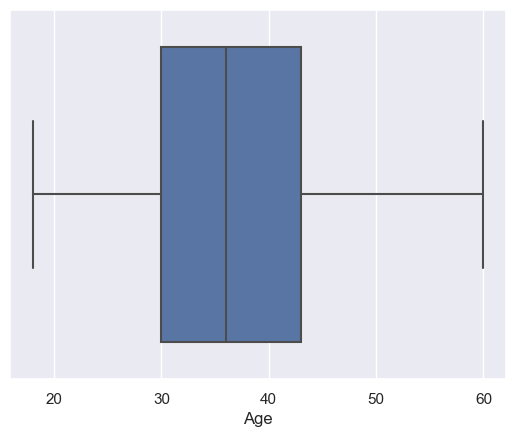

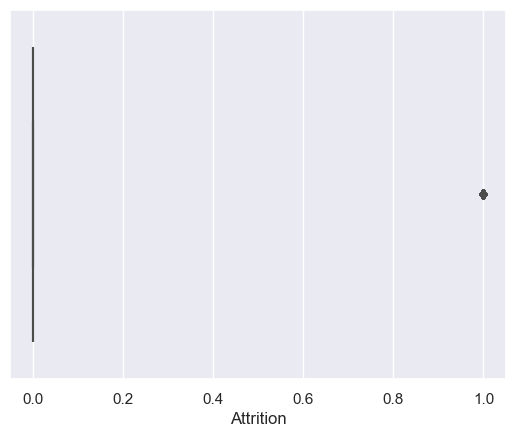

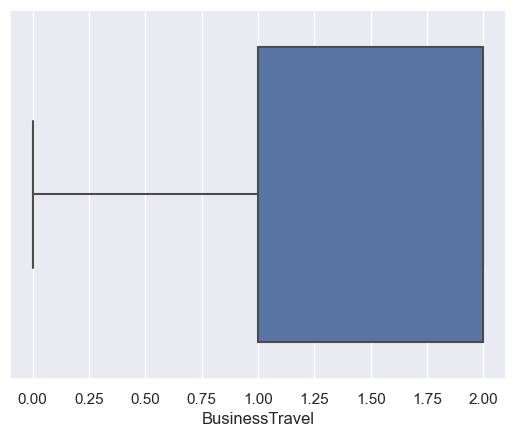

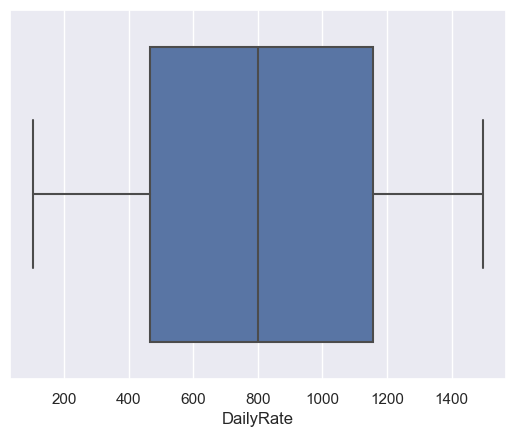

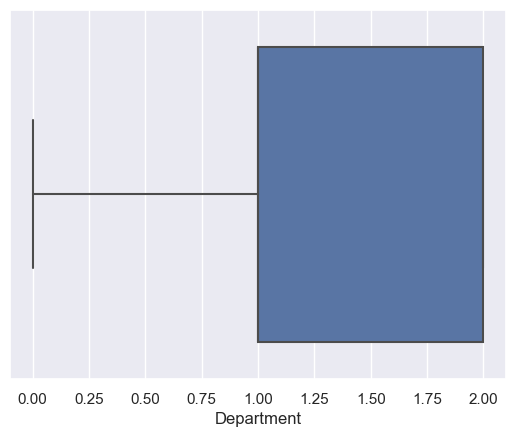

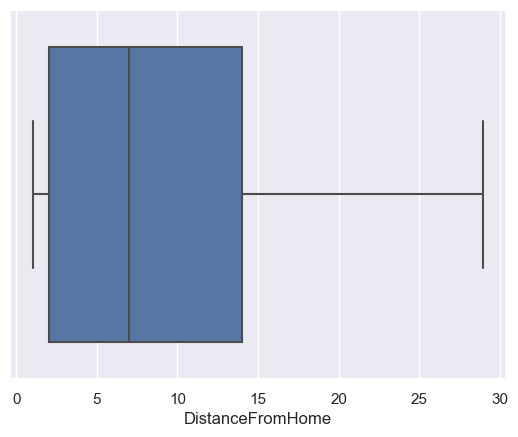

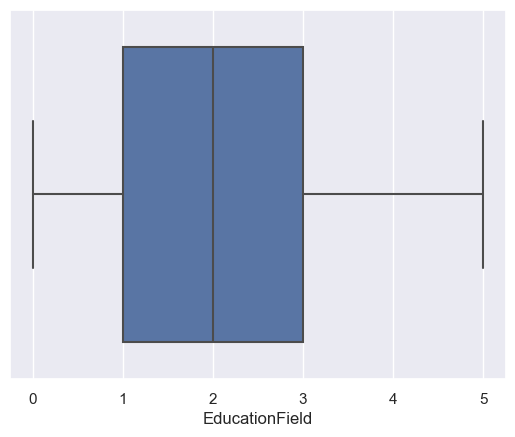

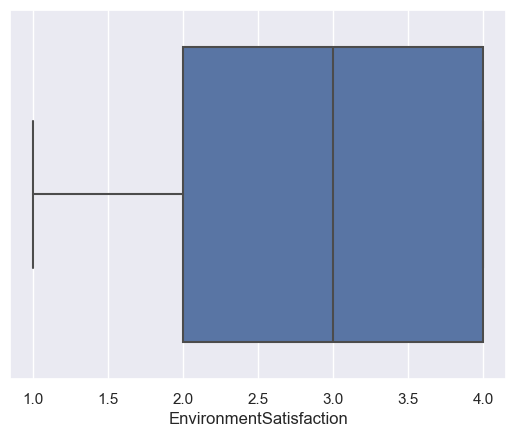

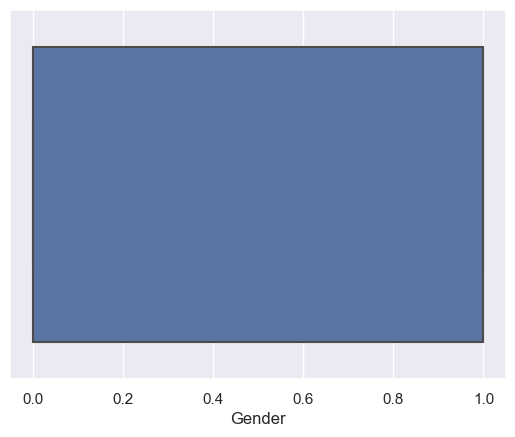

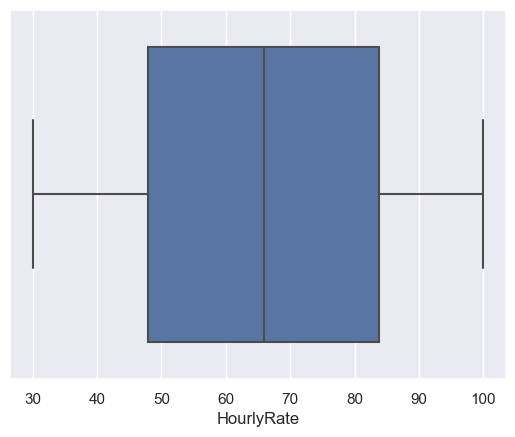

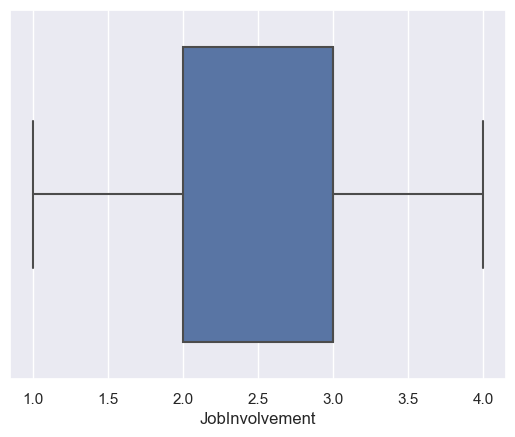

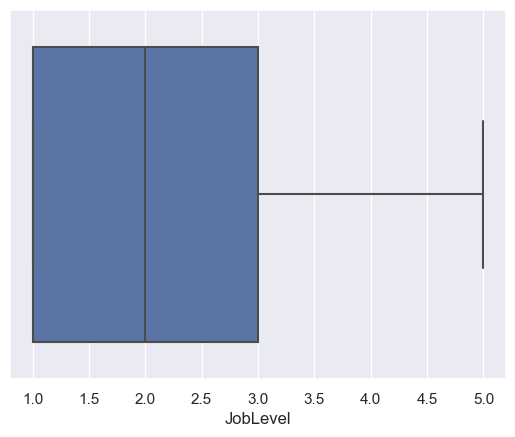

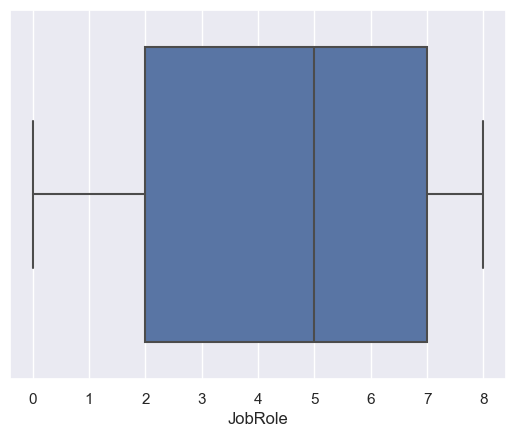

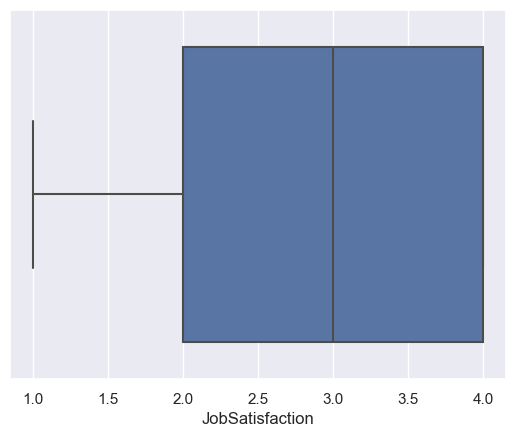

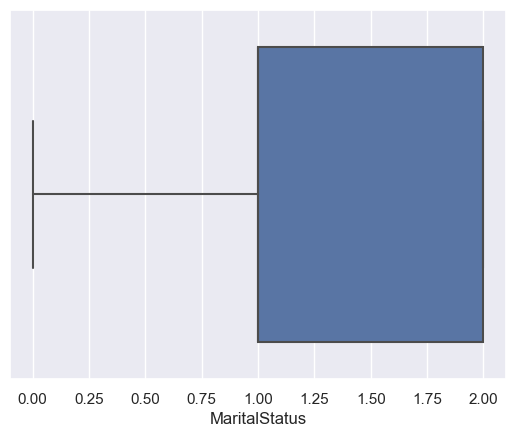

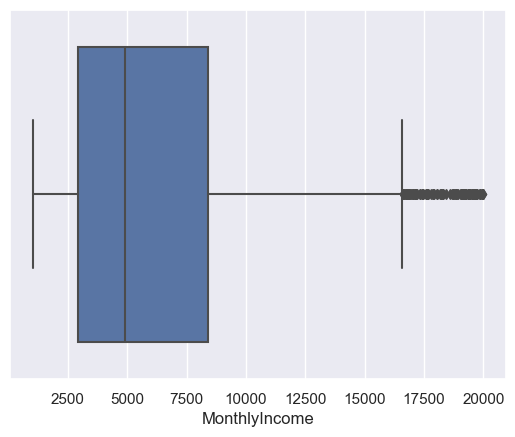

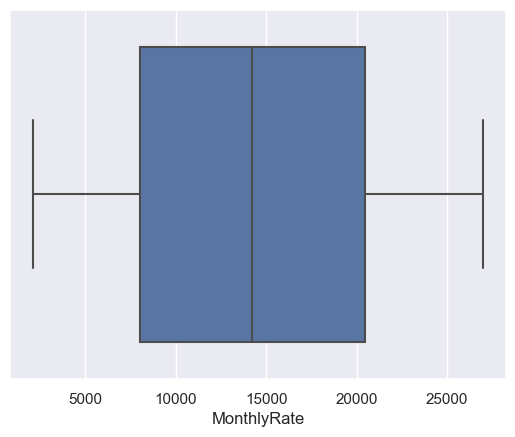

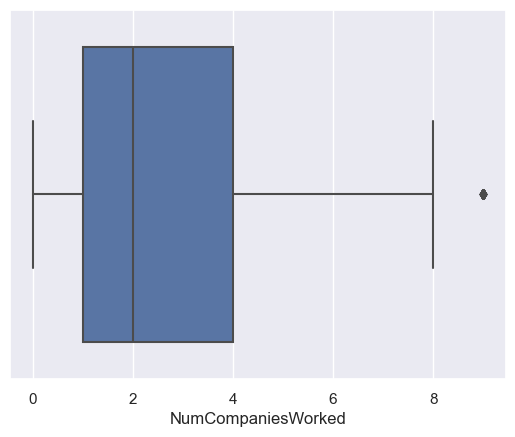

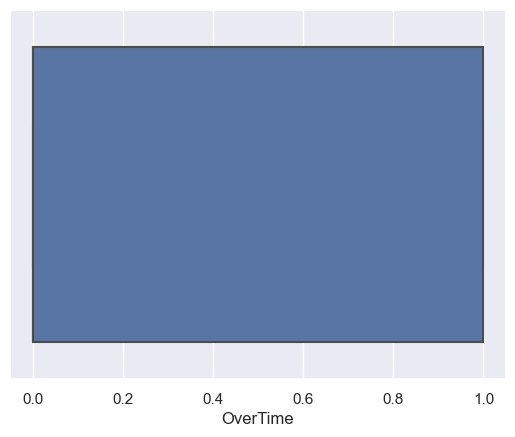

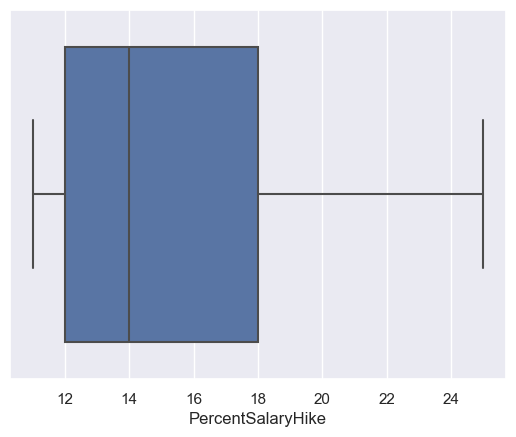

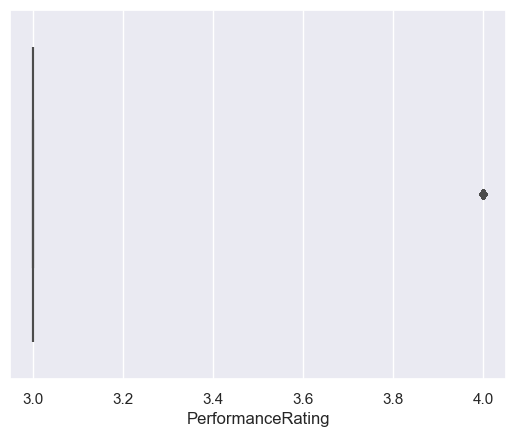

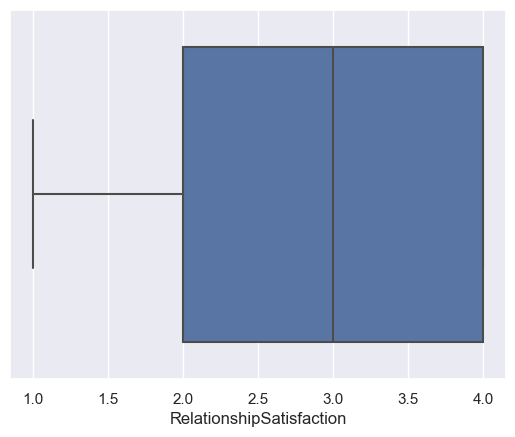

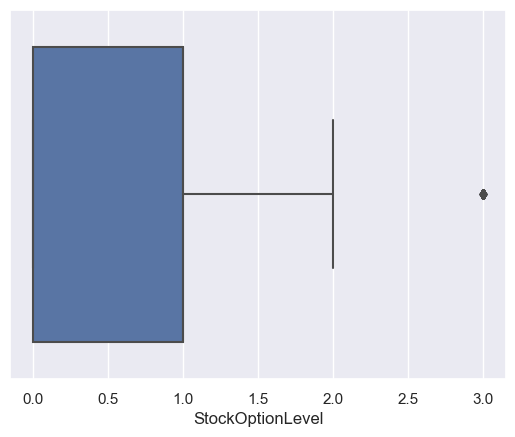

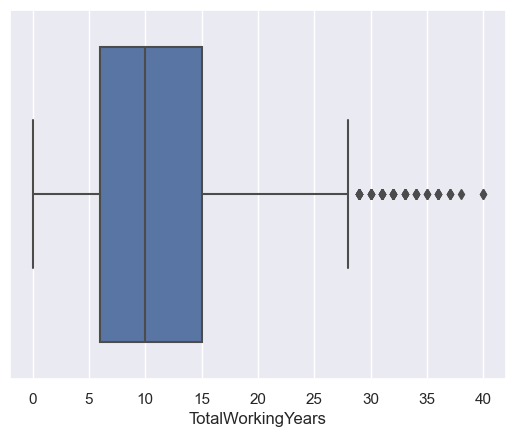

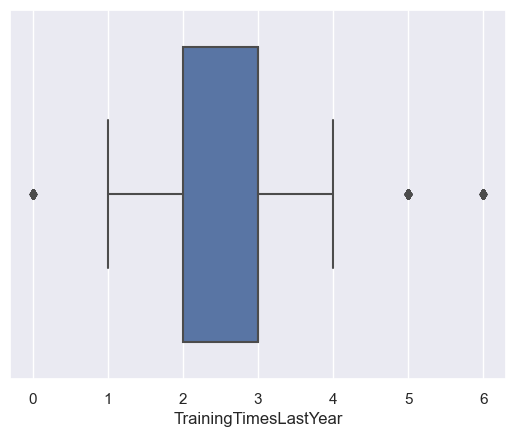

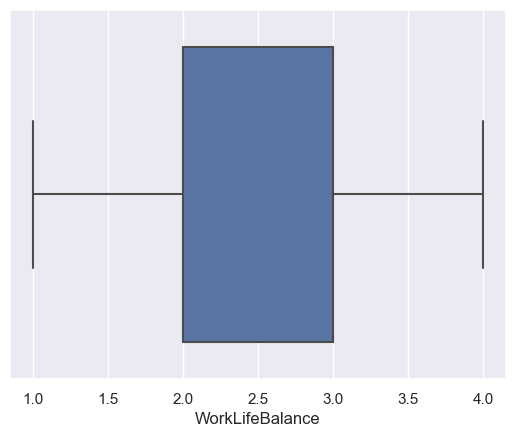

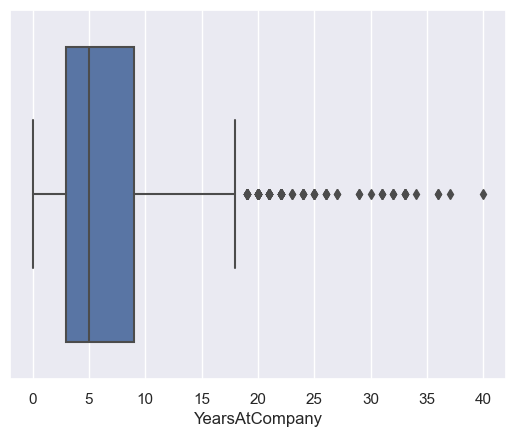

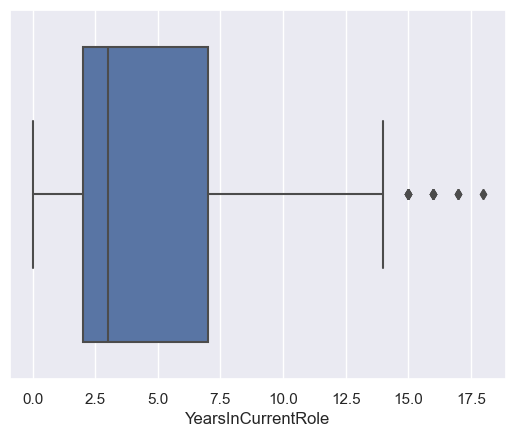

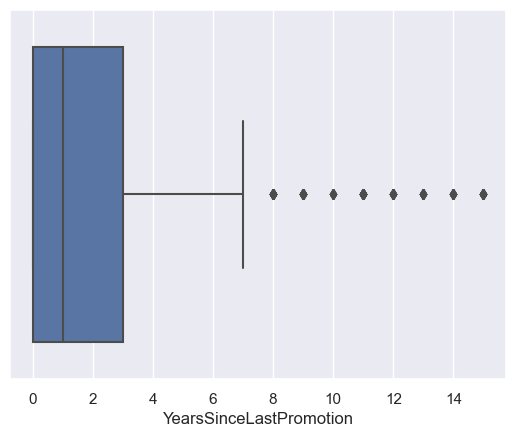

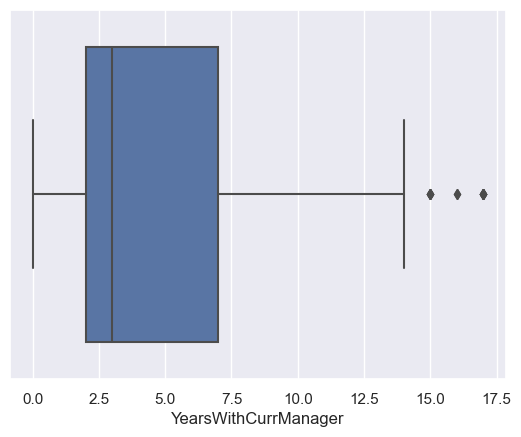

In [59]:
for col in data.columns:
    sns.boxplot(data=data,x=col)
    plt.xlabel(col)
    plt.show()

In [60]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'EducationField', 'EnvironmentSatisfaction',
       'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [65]:
x = data.drop("Attrition",axis=1)
y = data['Attrition']

In [66]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,1,2,0,94,3,...,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,3,1,61,2,...,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,4,4,1,92,2,...,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,1,4,0,56,3,...,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,3,1,1,40,3,...,3,4,1,6,3,3,2,2,2,2


In [67]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
# vif_dataframe = pd.DataFrame()
# vif_dataframe["columns"] = x.columns
# vif_dataframe["VIF_values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
# vif_dataframe

In [69]:
# plt.figure(figsize=(20,20),dpi=130)
# sns.heatmap(x.corr(),annot=True,cmap='crest')

In [70]:
# for index, row in vif_dataframe.iterrows():
#     if row['VIF_values'] > 10:
#         column_to_remove = row['columns']
#         x.drop(column_to_remove, axis=1, inplace=True)

In [71]:
# vif_dataframe = pd.DataFrame()
# vif_dataframe["columns"] = x.columns
# vif_dataframe["VIF_values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
# vif_dataframe

In [72]:
# x.shape, y.shape

In [73]:
## Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(x)

In [74]:
## Spliting the data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(scaled_X,y,train_size=0.70,stratify = y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1029, 29), (441, 29), (1029,), (441,))

In [75]:
## Building Logistic Regression model

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(class_weight='balanced')

In [76]:
classifier.fit(x_train,y_train)
predicted_values = classifier.predict(x_test)
predicted_proba = classifier.predict_proba(x_test)

In [77]:
predicted_values

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,

In [78]:
predicted_proba

array([[5.29891494e-01, 4.70108506e-01],
       [8.09391611e-01, 1.90608389e-01],
       [9.67165134e-01, 3.28348663e-02],
       [9.74590439e-01, 2.54095615e-02],
       [7.28610842e-01, 2.71389158e-01],
       [5.20057116e-01, 4.79942884e-01],
       [6.28113412e-01, 3.71886588e-01],
       [7.50323944e-02, 9.24967606e-01],
       [8.20712853e-01, 1.79287147e-01],
       [9.43005673e-01, 5.69943265e-02],
       [6.63605826e-01, 3.36394174e-01],
       [8.81520216e-01, 1.18479784e-01],
       [3.07233904e-01, 6.92766096e-01],
       [9.31434491e-01, 6.85655085e-02],
       [1.22912669e-01, 8.77087331e-01],
       [6.99136599e-01, 3.00863401e-01],
       [5.17694136e-01, 4.82305864e-01],
       [5.82332732e-01, 4.17667268e-01],
       [9.75864355e-01, 2.41356447e-02],
       [4.94769999e-01, 5.05230001e-01],
       [5.91596987e-01, 4.08403013e-01],
       [7.70097845e-01, 2.29902155e-01],
       [2.51860563e-01, 7.48139437e-01],
       [9.93353772e-01, 6.64622850e-03],
       [6.683830

In [79]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test,predicted_values)
cf

array([[265, 105],
       [ 24,  47]], dtype=int64)

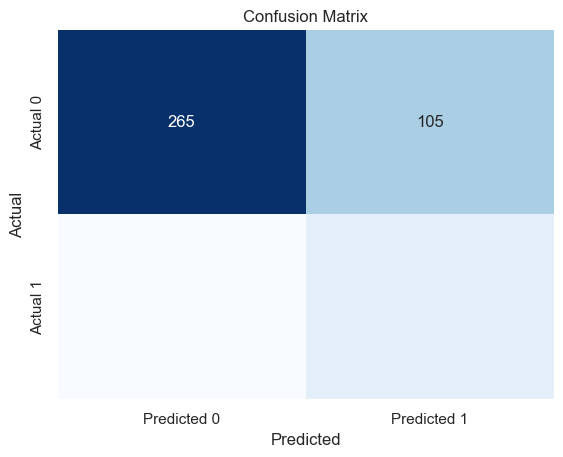

In [80]:
## Creating heatmap for confusion matrix

sns.heatmap(cf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [81]:
from sklearn.metrics import classification_report
k = classification_report(y_test,predicted_values)
print(k)

              precision    recall  f1-score   support

           0       0.92      0.72      0.80       370
           1       0.31      0.66      0.42        71

    accuracy                           0.71       441
   macro avg       0.61      0.69      0.61       441
weighted avg       0.82      0.71      0.74       441



In [82]:
## Gathering Precision/Recall score for different thresholds

from sklearn.metrics import precision_recall_curve
precision_points, recall_points, threshold_points = precision_recall_curve(y_test,predicted_proba[:,1])
precision_points.shape, recall_points.shape, threshold_points.shape

((442,), (442,), (441,))

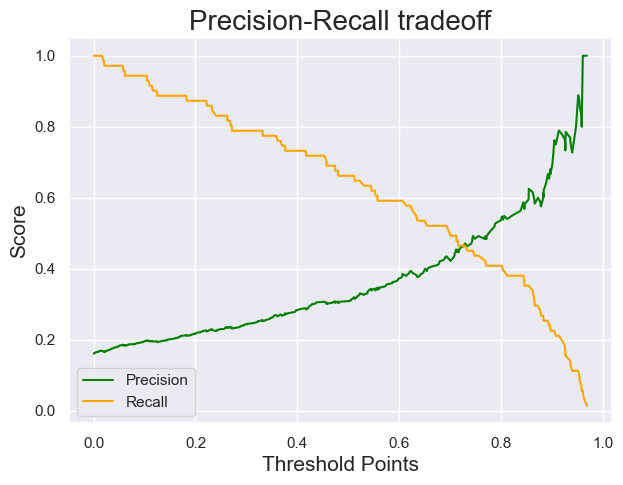

In [83]:
plt.figure(figsize =(7,5), dpi = 100)
plt.plot(threshold_points, precision_points[:-1],color = 'green', label='Precision')
plt.plot(threshold_points, recall_points[:-1], color = 'orange', label='Recall')
plt.xlabel('Threshold Points',fontsize = 15)
plt.ylabel('Score',fontsize = 15)
plt.title('Precision-Recall tradeoff', fontsize = 20)
plt.legend()

### Plotting Aoc Roc Cutve

In [84]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,threshold = roc_curve(y_test,predicted_proba[:,1])

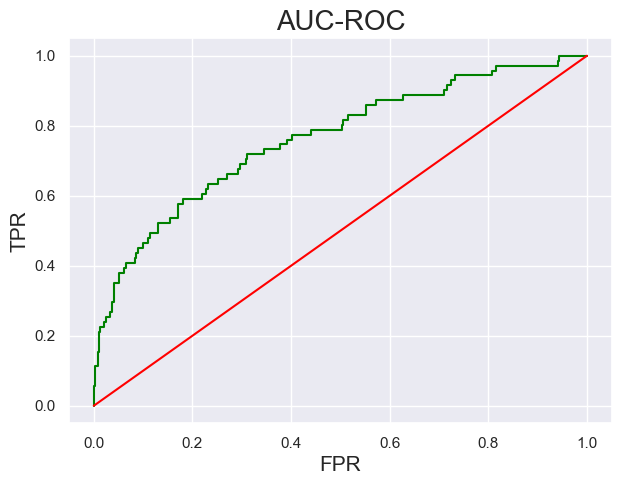

0.7617814998096688

In [85]:
plt.figure(figsize = (7,5), dpi = 100)
plt.plot(fpr,tpr,color = 'green')
plt.plot([0,1],[0,1], label ='baseline',color ='red')
plt.xlabel('FPR', fontsize = 15)
plt.ylabel('TPR', fontsize = 15)
plt.title('AUC-ROC', fontsize = 20)
plt.show()
roc_auc_score(y_test,predicted_proba[:,1])

### Coefficient PLot

In [86]:
c = classifier.coef_.reshape(-1)
x = x.columns

coef_plot = pd.DataFrame({
                           'coefficient':c,
                           'variables': x
                          })

# sorting the values
coef_plot = coef_plot.sort_values(by = 'coefficient')
coef_plot.head()

,coefficient,variables
22,-0.721162,TotalWorkingYears
14,-0.540519,MonthlyIncome
28,-0.534640,YearsWithCurrManager
12,-0.508551,JobSatisfaction
6,-0.507554,EnvironmentSatisfaction


Text(0.5, 1.0, 'Coefficient plot')

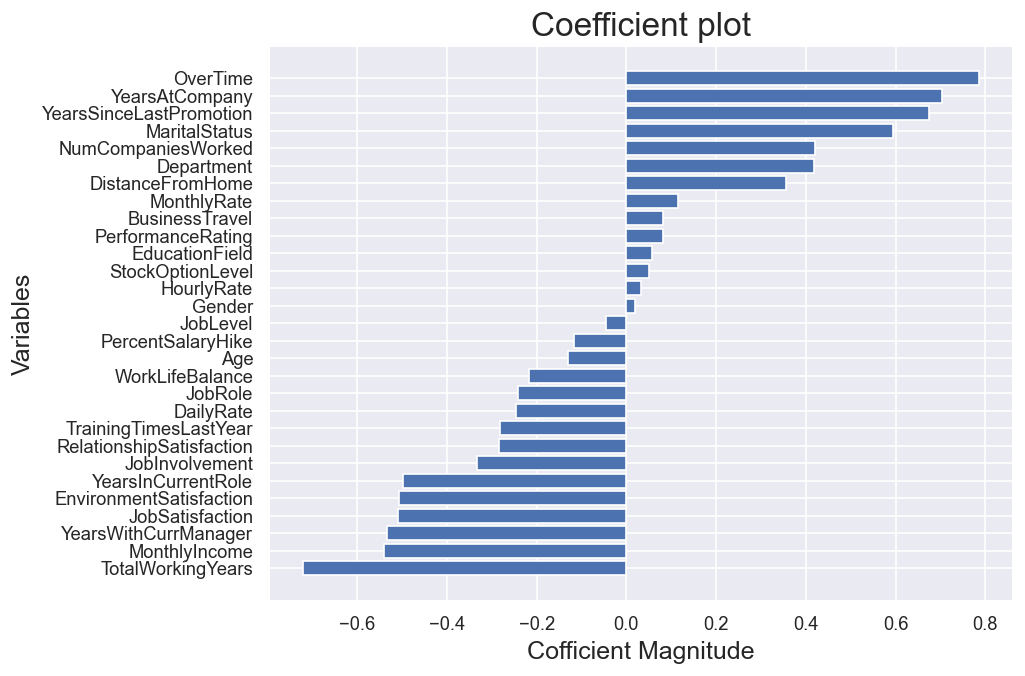

In [87]:
plt.figure(figsize=(8,6),dpi=120)
plt.barh(coef_plot['variables'], coef_plot['coefficient'])
plt.xlabel('Cofficient Magnitude',fontsize = 15)
plt.ylabel('Variables',fontsize=15)
plt.title('Coefficient plot', fontsize =20)